In [1]:
# Importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
pd.options.mode.chained_assignment = None

Problem Statement: BigMart has collected sales data for 1559 products across 10 stores in different cities. Attributes of each product and store have been defined. 

Objective:
1. Build a predictive model and find out the sales of each product at a particular store
2. Using Ridge and Lasso regression techniques, interpret the coefficients of the model
3. Make predictions using the model
4. Evaluate model efficiency using RMSE and R-Square values

Let's try and understand what could affect the target variable 'Sales'?

1. The time of the week - that is weekends as they are usually busy
2. Higher sales according to the time of the day that is, mornings and evenings
3. Higher sales during the end of the year
4. Items with more shelf space sell more.

In [2]:
# Importing the data
train_data = pd.read_csv('bigmart_train.csv')
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
train_data.shape

(8523, 12)

The data contains 8523 rows and 12 columns

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Checking of NaN variables
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The column Item_weight has 1463 missing items and Outlet_Size has 2410 mising_items

In [6]:
# Printing unique values in the Fat_Content and Outlet_Establishment_Year

train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
train_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [8]:
# Calculating Outlet Age

train_data['Outlet_Age'] = 2021 - train_data['Outlet_Establishment_Year']
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [9]:
# Printing unique values of Outlet_Size
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
# Descriptive statistics of train_data

train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,23.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,12.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,17.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,22.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,34.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,36.000000


Here,

1. Item_Visibility has minimum value of 0. This makes no practical sense, because when a product is being sold the visibility cannot be 0
2. Outlet_Establishment_Year varies from 1985 to 2009

In [11]:
# Printing the value count for Item_Fat_Content

train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We can observe, low fat is most abundant

In [12]:
# Printing the value count for Outlet_Size
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium and small scale size have high potential

In [13]:
# Filling the missing values in outlet size with Medium

train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [14]:
# Filling the missing values in Item_weight with Mean weight

train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mode())

<AxesSubplot:>

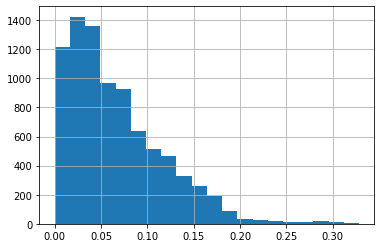

In [15]:
# Plotting histogram reveals the distribution of Item_Visibility

train_data['Item_Visibility'].hist(bins=20)

In [16]:
# Detecting and removing outliers
# Calculating first and second quantile for Item_Visibility

Q1 = train_data['Item_Visibility'].quantile(0.25)
Q3 = train_data['Item_Visibility'].quantile(0.75)

# Calculating Inter quarter range (IQR)

IQR = Q3- Q1

# Now, Remove outliers from data

filt_train = train_data.query('(@Q1 - 1.5*@IQR) <= Item_Visibility <=(@Q3 + 1.5*@IQR)')

In [17]:
# Display the data
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [18]:
filt_train.shape, train_data.shape

((8379, 13), (8523, 13))

In [19]:
train_data = filt_train 

In [20]:
train_data.shape

(8379, 13)

In [23]:
# Modifying the Item_Visibility by converting the numerical values into categories

train_data['Item_Visibility_bins'] = pd.cut(train_data['Item_Visibility'], [0.000, 0.065,0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])

In [24]:
train_data['Item_Visibility_bins'].value_counts()

Low Viz     4403
Viz         2557
High Viz     893
Name: Item_Visibility_bins, dtype: int64

In [25]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visisbility_bins,Item_Visibility_bins
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,Low Viz,Low Viz
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,Low Viz,Low Viz
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,Low Viz,Low Viz
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23,NaN,NaN
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34,Low Viz,Low Viz
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19,Low Viz,Low Viz
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17,Low Viz,Low Viz
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12,High Viz,High Viz


In [42]:
# Replacing null values with Low Visibility

train_data['Item_Visibility_bins'] = train_data['Item_Visibility_bins'].replace(np.nan, 'Low Viz', regex = True)

In [27]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['Low fat', 'LF', 'low fat'], 'Low Fat')

In [28]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')

In [43]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visisbility_bins,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300,0,0.016047,249.8092,1,0,3735.1380,22,Low Viz,1,0,1,0,0
1,5.920,1,0.019278,48.2692,1,2,443.4228,12,Low Viz,1,0,0,1,0
2,17.500,0,0.016760,141.6180,1,0,2097.2700,22,Low Viz,1,0,1,0,0
3,19.200,1,0.000000,182.0950,1,2,732.3800,23,NaN,3,1,0,0,0
4,8.930,0,0.000000,53.8614,0,2,994.7052,34,NaN,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,2778.3834,34,Low Viz,1,0,1,0,0
8519,8.380,1,0.046982,108.1570,1,1,549.2850,19,Low Viz,1,0,1,0,0
8520,10.600,0,0.035186,85.1224,2,1,1193.1136,17,Low Viz,1,0,1,0,0
8521,7.210,1,0.145221,103.1332,1,2,1845.5976,12,High Viz,0,0,0,1,0


In [30]:
# Converting all categorical values into numeric using labelencoder from sklearn

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [31]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [32]:
# Transforming item fat content
train_data['Item_Fat_Content'] = LE.fit_transform(train_data['Item_Fat_Content'])

In [33]:
# Transfroming Item Visisbility bins

train_data['Item_Visibility_bins'] = LE.fit_transform(train_data['Item_Visibility_bins'])

In [34]:
# Transforming Outlet_Size

train_data['Outlet_Size'] = LE.fit_transform(train_data['Outlet_Size'])

In [35]:
# Transforming Outlet_Location_Type

train_data['Outlet_Location_Type'] = LE.fit_transform(train_data['Outlet_Location_Type'])

In [36]:
# Create dummies for Outlet type
dummy = pd.get_dummies(train_data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [37]:
# merging both train and dummy dataframe

train_data = pd.concat([train_data, dummy], axis = 1)

In [38]:
train_data.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content                int32
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                     int32
Outlet_Location_Type            int32
Outlet_Type                    object
Item_Outlet_Sales             float64
Outlet_Age                      int64
Item_Visisbility_bins        category
Item_Visibility_bins            int32
Grocery Store                   uint8
Supermarket Type1               uint8
Supermarket Type2               uint8
Supermarket Type3               uint8
dtype: object

In [ ]:
# Dropping irrelevant variables

train_data = train_data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type', 'Outlet_Establishment_Year'], axis=1)

In [47]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visisbility_bins', 'Item_Visibility_bins',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [48]:
train_data = train_data.drop('Item_Visisbility_bins', axis=1)

In [77]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [78]:
train_data.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Item_Outlet_Sales       0
Outlet_Age              0
Item_Visibility_bins    0
Grocery Store           0
Supermarket Type1       0
Supermarket Type2       0
Supermarket Type3       0
dtype: int64

In [50]:
# Apply Linearregression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error

In [82]:
# Creating independent variable X

X = train_data.drop('Item_Outlet_Sales', axis=1)

# Creating dependent Variables y

y = train_data.Item_Outlet_Sales

In [83]:
# Reading test dataset in pandas

test_data = pd.read_csv('bigmart_test.csv')

In [53]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [54]:
# Filling the missing values in outlet size with Medium

test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])

In [55]:
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [56]:
# Modifying the Item_Visibility by converting the numerical values into categories

test_data['Item_Visibility_bins'] = pd.cut(test_data['Item_Visibility'], [0.000, 0.065,0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])

In [57]:
# Replacing null values with Low Visibility

test_data['Item_Visibility_bins'] = test_data['Item_Visibility_bins'].replace(np.NaN, 'Low Viz', regex = True)

In [58]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_bins
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Low Viz
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low Viz
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Viz
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low Viz
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Viz
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,Low Viz
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,High Viz
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,Viz
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [59]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['Low fat', 'LF', 'low fat'], 'Low Fat')

test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('reg', 'Regular')

test_data['Item_Fat_Content'] = LE.fit_transform(test_data['Item_Fat_Content'])

test_data['Item_Visibility_bins'] = LE.fit_transform(test_data['Item_Visibility_bins'])

test_data['Outlet_Size'] = LE.fit_transform(test_data['Outlet_Size'])

test_data['Outlet_Location_Type'] = LE.fit_transform(test_data['Outlet_Location_Type'])

In [67]:
test_data['Outlet_Age'] = LE.fit_transform(test_data['Outlet_Establishment_Year'])

In [68]:
# Create dummies for Outlet type
dummy = pd.get_dummies(test_data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [69]:
# merging both test and dummy dataframe

test_data = pd.concat([test_data, dummy], axis = 1)

In [70]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Outlet_Age,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,...,1,0,1,0,0,4,0,1,0,0
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,1,1,...,1,0,1,0,0,7,0,1,0,0
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,1,2,...,2,1,0,0,0,3,1,0,0,0
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,...,1,0,1,0,0,7,0,1,0,0
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1985,1,2,...,2,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,...,1,0,1,0,0,2,0,1,0,0
5677,FDD47,7.600000,1,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,...,0,0,0,1,0,8,0,0,1,0
5678,NCO17,10.000000,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,...,2,0,1,0,0,5,0,1,0,0
5679,FDJ26,15.300000,1,0.000000,Canned,214.6218,OUT017,2007,1,1,...,3,0,1,0,0,7,0,1,0,0


In [71]:
X_test_data = test_data.drop(['Item_Identifier','Outlet_Identifier', 'Item_Type', 'Outlet_Type', 'Outlet_Establishment_Year'], axis=1)

In [72]:
X.columns, X_test_data.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Visibility_bins',
        'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
        'Supermarket Type3', 'Outlet_Age', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [86]:
LR =LinearRegression()

In [87]:
# Coefficient and intercept

LR.fit(X_train, y_train)

LinearRegression()

In [88]:
b = LR.coef_
print(b)

m = LR.intercept_
print(m)

[    3.35498386    27.1233206   -105.83764997    15.96668659
    16.77954595     8.03832492    -2.27509654    23.30483764
 -1754.40268587   219.66926295  -122.49762598  1657.2310489 ]
-202.9511740038497


In [89]:
predictions = LR.predict(X_test)

In [90]:
predictions

array([-605.78677412, 2859.40227432, 1476.78566549, ..., 1905.77128745,
       3145.7856582 , 4249.57171087])

In [93]:
from math import sqrt

print(sqrt(mean_squared_error(y_test, predictions)))

1118.4806080899805


## Now using ridge, lasso and elasticnet we can find out the RMSE and R2 values

In [103]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
print(sqrt(mean_squared_error(y_train, ridge.predict(X_train))))
print(sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
print('R2 Value/Coefficient of Determination : {} '.format(ridge.score(X_test, y_test)))

1139.4529871149705
1118.4805756922024
R2 Value/Coefficient of Determination : 0.5485619193786421 


In [104]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
print(sqrt(mean_squared_error(y_train, lasso.predict(X_train))))
print(sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
print('R2 Value/Coefficient of Determination : {} '.format(lasso.score(X_test, y_test)))

1139.4529873536574
1118.4810518913603
R2 Value/Coefficient of Determination : 0.5485615349741486 


In [105]:
from sklearn.linear_model import ElasticNet

Elas = ElasticNet(alpha=0.001)
Elas.fit(X_train, y_train)
print(sqrt(mean_squared_error(y_train, Elas.predict(X_train))))
print(sqrt(mean_squared_error(y_test, Elas.predict(X_test))))
print('R2 Value/Coefficient of Determination : {} '.format(Elas.score(X_test, y_test)))

1139.459823879018
1118.3901354364925
R2 Value/Coefficient of Determination : 0.5486349229258725 


C:\Users\Siddhu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.439e+08, tolerance: 1.732e+06
  model = cd_fast.enet_coordinate_descent(
